# PCA


In [39]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpt
import plotly as plt
from plotly.subplots import make_subplots


from sklearn.preprocessing import PowerTransformer, StandardScaler, OrdinalEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../wine_data2.csv")

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

In [11]:
df.duplicated().sum()
df = df.drop_duplicates()

In [12]:
df.shape

(5329, 13)

In [13]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5319 non-null   float64
 2   volatile acidity      5321 non-null   float64
 3   citric acid           5326 non-null   float64
 4   residual sugar        5327 non-null   float64
 5   chlorides             5327 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5325 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 582.9+ KB
None
       fixed acidity  volatile acidity  citric acid  residual s

In [ ]:
df.head(2)

1

In [24]:

print(df.columns.to_list(), end=" ")

['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 

<Axes: xlabel='alcohol', ylabel='residual sugar'>

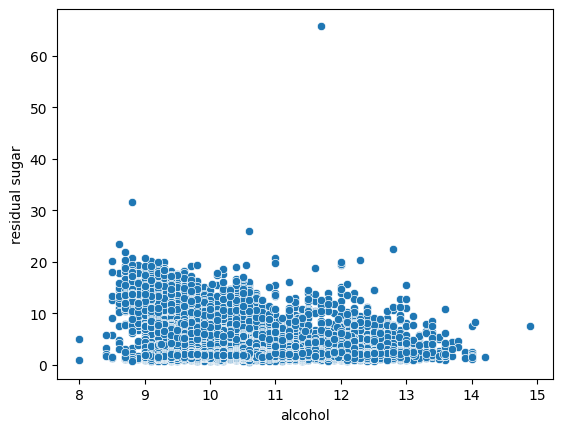

In [36]:
sns.scatterplot(x = df["alcohol"], y = df["residual sugar"])

<Axes: ylabel='alcohol'>

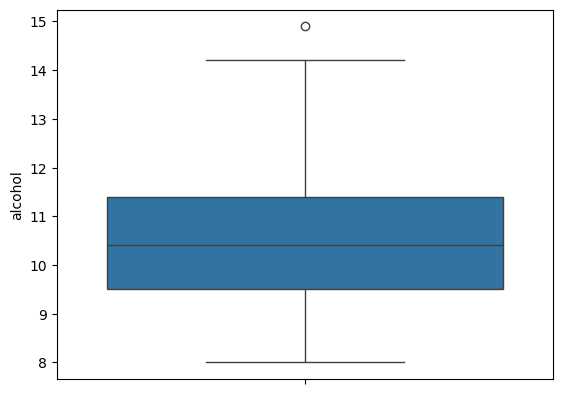

In [30]:
sns.boxplot(df['alcohol'])

1 outlier in alcohol

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_360\2035690723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

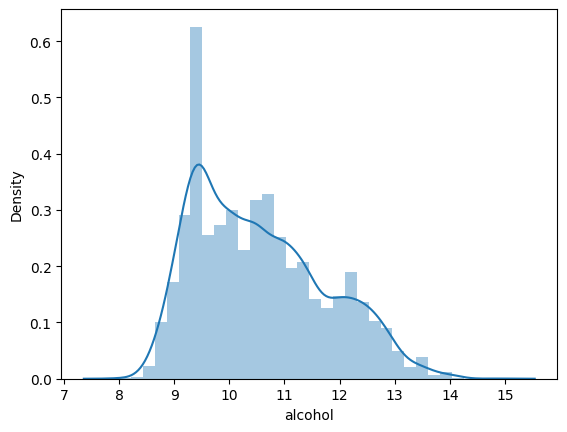

In [37]:
sns.distplot(df.alcohol)

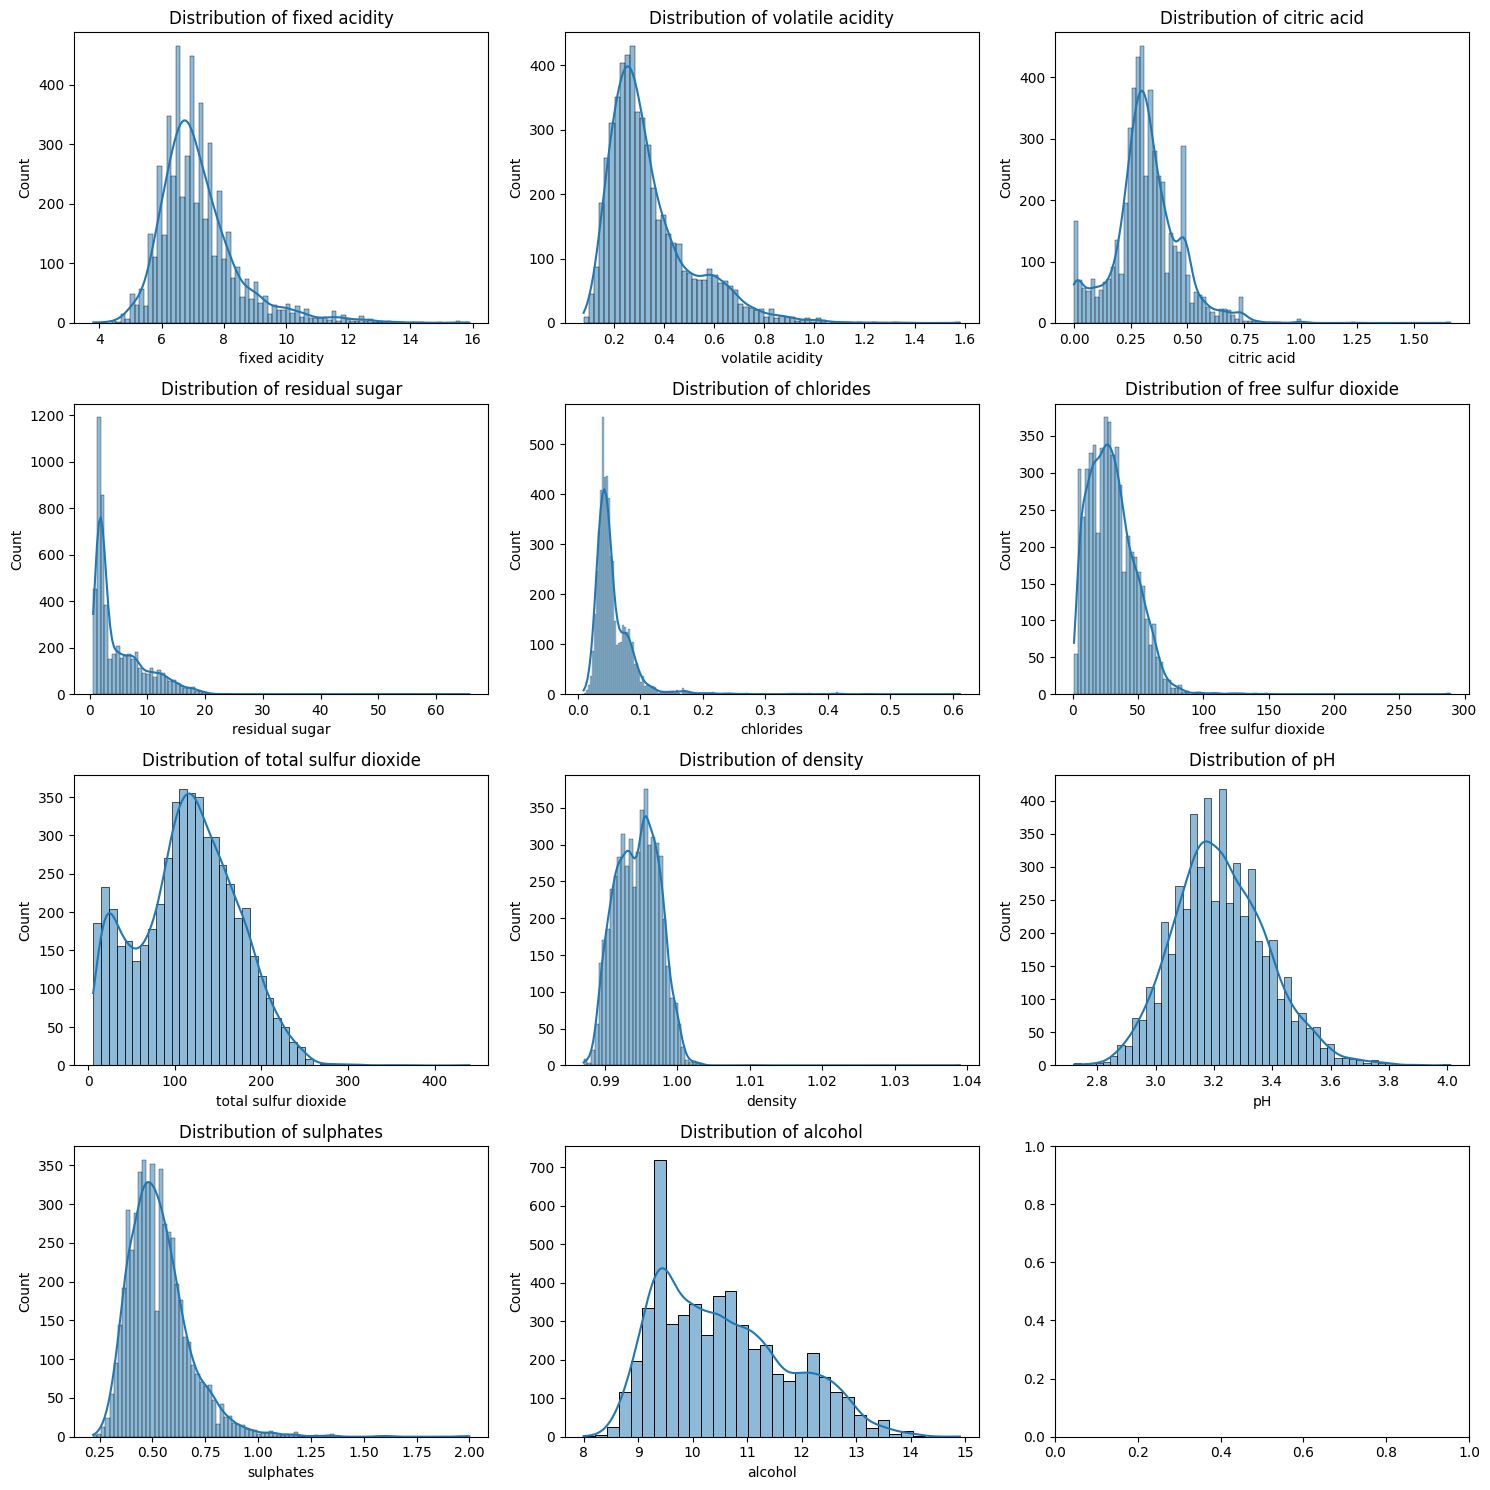

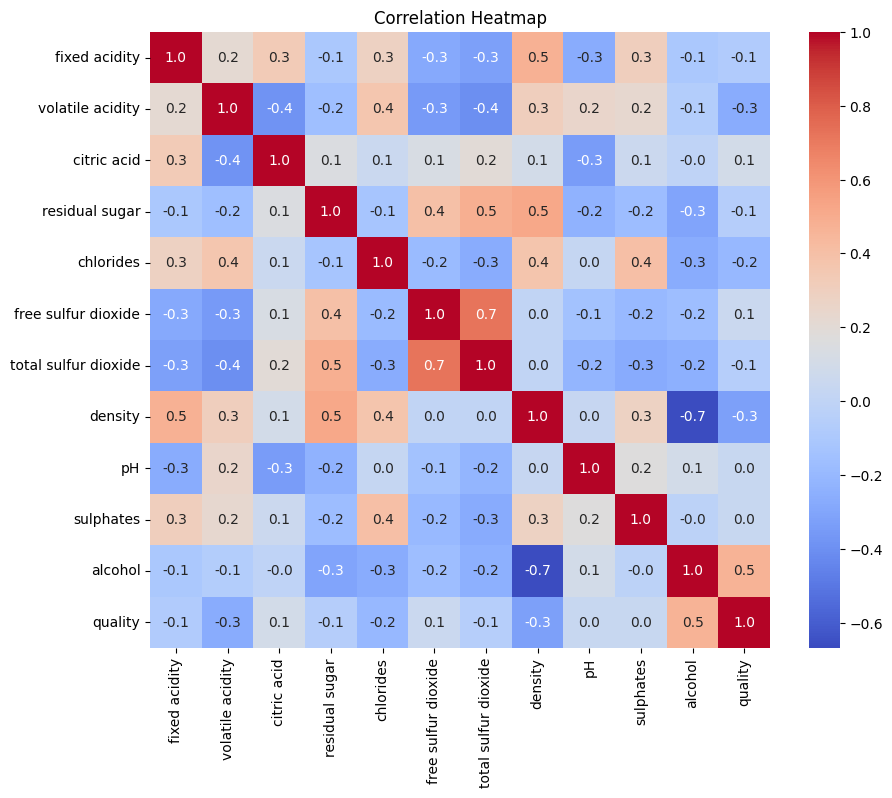

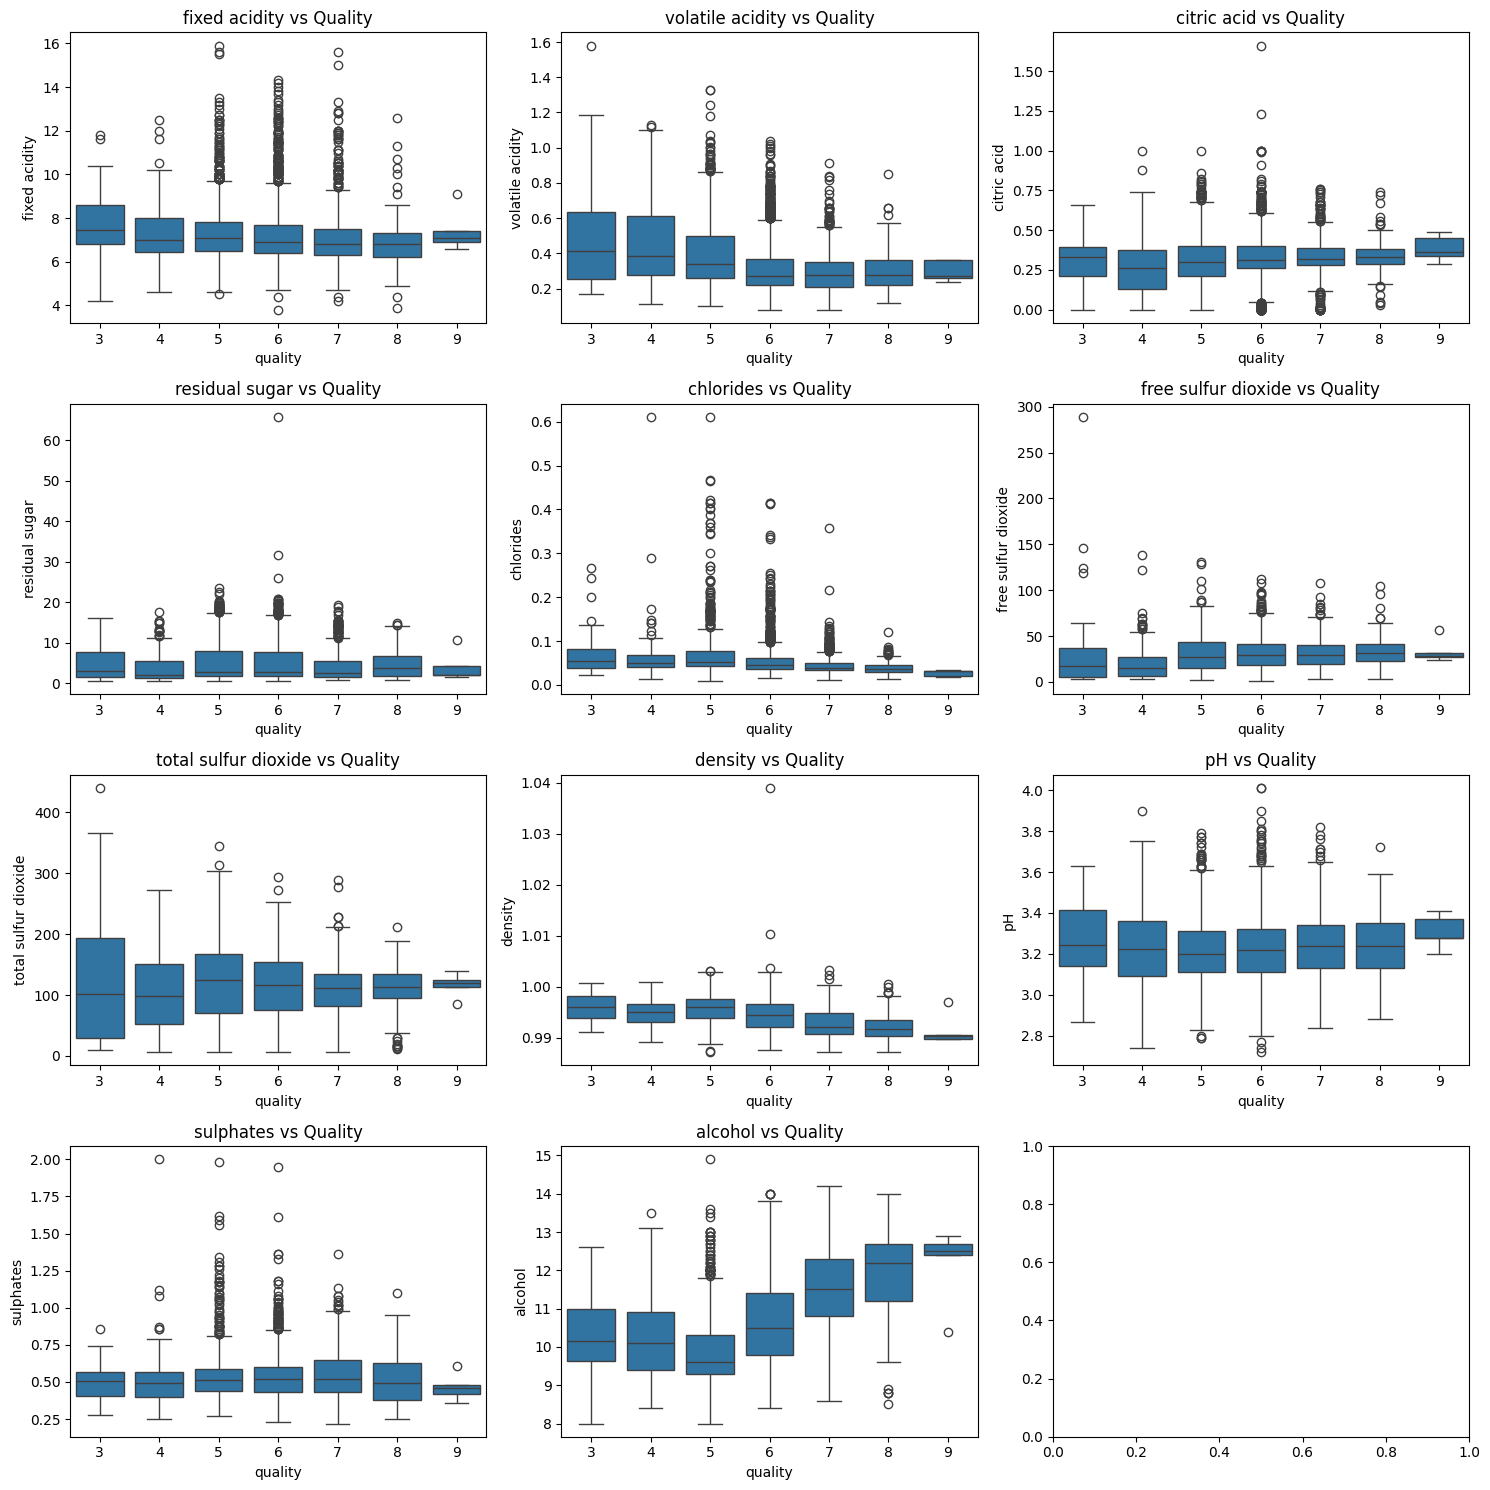

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. SETUP COLUMNS
# ensure 'quality' is actually in the list before dropping to avoid KeyError
numeric_df = df.select_dtypes(include=['float64', 'int64'])
num_cols = numeric_df.columns
if 'quality' in num_cols:
    num_cols = num_cols.drop('quality')

# 2. VISUALIZE DISTRIBUTIONS
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() 

for i, col in enumerate(num_cols):
    # Safety check: stop if we run out of subplot slots
    if i >= len(axes): break
    
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# 3. VISUALIZE CORRELATIONS (The Fix is Here)
plt.figure(figsize=(10, 8))
# Added numeric_only=True to fix the TypeError
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

# 4. VISUALIZE PREDICTORS
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i >= len(axes): break
    
    sns.boxplot(x='quality', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Quality')

plt.tight_layout()
plt.show()

In [42]:
df['type'] = df["type"].map({"red":0, "white":1})

In [45]:
df.type.value_counts()

type
1    3970
0    1359
Name: count, dtype: int64

In [51]:
print(df.shape)
df.columns

(5329, 13)


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [48]:
X = df.iloc[:, 1:13]
Y = df.iloc[:, 0]

In [49]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
Xtrain.shape, Xtest.shape
Ytest.shape, Ytrain.shape


((1066,), (4263,))

In [64]:
# Xtest.info
Xtest.columns[0:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
trf1 = ColumnTransformer([("Imputation", KNNImputer(n_neighbors=10, weights="distance", add_indicator=True), slice(0,12)),
                          ("encoding", OrdinalEncoder(), [11])])